## Getting to know data

In [3]:
import librosa
from matplotlib import pyplot as plt
import librosa.display
import IPython.display as ipd
import os
import audioread
from matplotlib.pyplot import specgram
import numpy as np
import pandas as pd
import re
import warnings
from typing import Tuple, Union
import glob
import random


In [4]:
# path for audio files directory:
data_path = 'data/cats_dogs/'

# read all wave files
wave_files = [file for file in os.listdir(data_path)]

n_cats = 0
n_dogs = 0
files_id=[]
pattern='(\w*_\d*).wav'
for n in wave_files:
    files_id.append(re.search(pattern, n ).group(1))
    if 'cat' in n:
        n_cats += 1
    elif 'dog' in n:
        n_dogs +=1
    else: 
        warnings.warn(f" ....... this file - {n} seems to not be dog nor cat")


In [5]:
# lets load the data and check if every audio file has consistent sampling rate and number of channels. 

def load_data( data_path: str, sr:Union[int, None] = None)-> Tuple[list, list, list, list, list, list]:
    '''
    This function loads data from the audio files and returns a list of audio files, sampling rate of each file, 
    number of channels for dogs and cats
    :param data_path : Its the path to audio files
    :param sr: sampling rate
    :return : list of audio files, sampling rate of each file, number of channels for dogs and cats
    
    '''
        
    cats_wave_list = []
    cats_sr=[]
    channel_cats = []
    dogs_wave_list = []
    channel_dogs = []
    dogs_sr=[]
       
    for cat_file in glob.glob(data_path+'/cat*.wav') :
        cat_i, sr_i = librosa.load(cat_file,sr=sr)
        cats_wave_list.append(cat_i)
        cats_sr.append(sr_i)
        with audioread.audio_open(cat_file) as input_file:
            channel_cats.append(input_file.channels)
   
    for dog_file in glob.glob(data_path+'/dog*.wav'):
        dog_j, sr_j = librosa.load(dog_file,sr=sr)
        dogs_wave_list.append(dog_j)
        dogs_sr.append(sr_j)
        with audioread.audio_open(dog_file) as input_file:
            channel_dogs.append(input_file.channels)

    
    return cats_wave_list, cats_sr, channel_cats, dogs_wave_list, dogs_sr, channel_dogs

In [6]:
#load the files:
Cats_audio, cats_sr, channel_cats, Dogs_audio, dogs_sr, channel_dogs= load_data( data_path, sr=None)

In [7]:
set(dogs_sr)

{16000}

In [9]:

#Summary of data:

print('Number of Files per class:')
print('Cats audio files loaded: ' + str(len(Cats_audio)) + ' files')
print('Dogs audio files loaded: ' + str(len(Dogs_audio)) + ' files')
print('\n')


print('Number of Channels per class:')
cc=list(set(channel_cats))
cd=list(set(channel_dogs))
if len(cc)==1:
    print('all cat files have the same number of channels: ' + str(cc[0]) )
else: 
    print('cat files have different number of channels: ' + str(cc) )  
if len(cd)==1:
    print('all dog files have the same number of channels: ' + str(cd[0]) )
else: 
    print('dog files have different number of channels: ' + str(cd) )  
if cd!=cc:
    print("number of channels is different between cats and dogs")
else:
    n_channels=channel_cats[0]
print('\n')

print('Sampling rates per class:')
SRs_cat=list(set(cats_sr))
SRs_dog=list(set(dogs_sr))

if len(SRs_cat)==1:
    print('all cat files have the same sampling rate: ' + str(SRs_cat[0]) + ' samples per second' )
else: 
    print('cat files have different sampling rates: ' + str(SRs_cat)+' ----> should be normalized'  )  
if len(cd)==1:
    print('all dog files have the same sampling rate: ' + str(SRs_dog[0]) + ' samples per second'  )
else: 
    print('dog files have different sampling rate: ' + str(SRs_dog) + ' ----> should be normalized' )  

if SRs_cat!=SRs_dog:
    print("sample rates are different between cats and dogs files----> should be normalized")
else:
    sr=cats_sr[0]
    
print('\n')

Number of Files per class:
Cats audio files loaded: 164 files
Dogs audio files loaded: 113 files


Number of Channels per class:
all cat files have the same number of channels: 1
all dog files have the same number of channels: 1


Sampling rates per class:
all cat files have the same sampling rate: 16000 samples per second
all dog files have the same sampling rate: 16000 samples per second




In [10]:
import statistics  as st  

sr = cats_sr[0]
# duration of files:
length_cats=[]
length_dogs=[]

for c in Cats_audio:
    length_cats.append(librosa.core.get_duration(y=c, sr=sr))
for d in Dogs_audio:
    length_dogs.append(librosa.core.get_duration(y=d, sr=sr))


max_length_cats=max(length_cats)
min_length_cats=min(length_cats)
av_length_cats=st.mean(length_cats)
max_length_dogs=max(length_dogs)
min_length_dogs=min(length_dogs)
av_length_dogs=st.mean(length_dogs)
print('Duration of audio files per class:')
print('the average duration of cat files is: ' + str(av_length_cats) + ' seconds')
print('the min is: ' +str(min_length_cats) + ' and the max is '+ str(max_length_cats)+ 'seconds')
print('the average duration of Dog files is: ' + str(av_length_dogs) + ' seconds')
print('the min is: ' +str(min_length_dogs) + ' and the max is '+ str(max_length_dogs)+ 'seconds')
print('Total length of cat audio files is:'+ str(sum(length_cats))+ ' seconds')
print('Total length of dog audio files is:',  str(sum(length_dogs))+ ' seconds')

Duration of audio files per class:
the average duration of cat files is: 8.072548399390245 seconds
the min is: 0.9233125 and the max is 17.976seconds
the average duration of Dog files is: 5.2959142699115045 seconds
the min is: 1.0156875 and the max is 17.2001875seconds
Total length of cat audio files is:1323.8979375000001 seconds
Total length of dog audio files is: 598.4383125 seconds


### Summary of data:
1. All audio files have same number of channels and sampling rate
2. we have more data for cats than dogs, we have to do some data augmentation to make them similar

Showing waves for Cats:


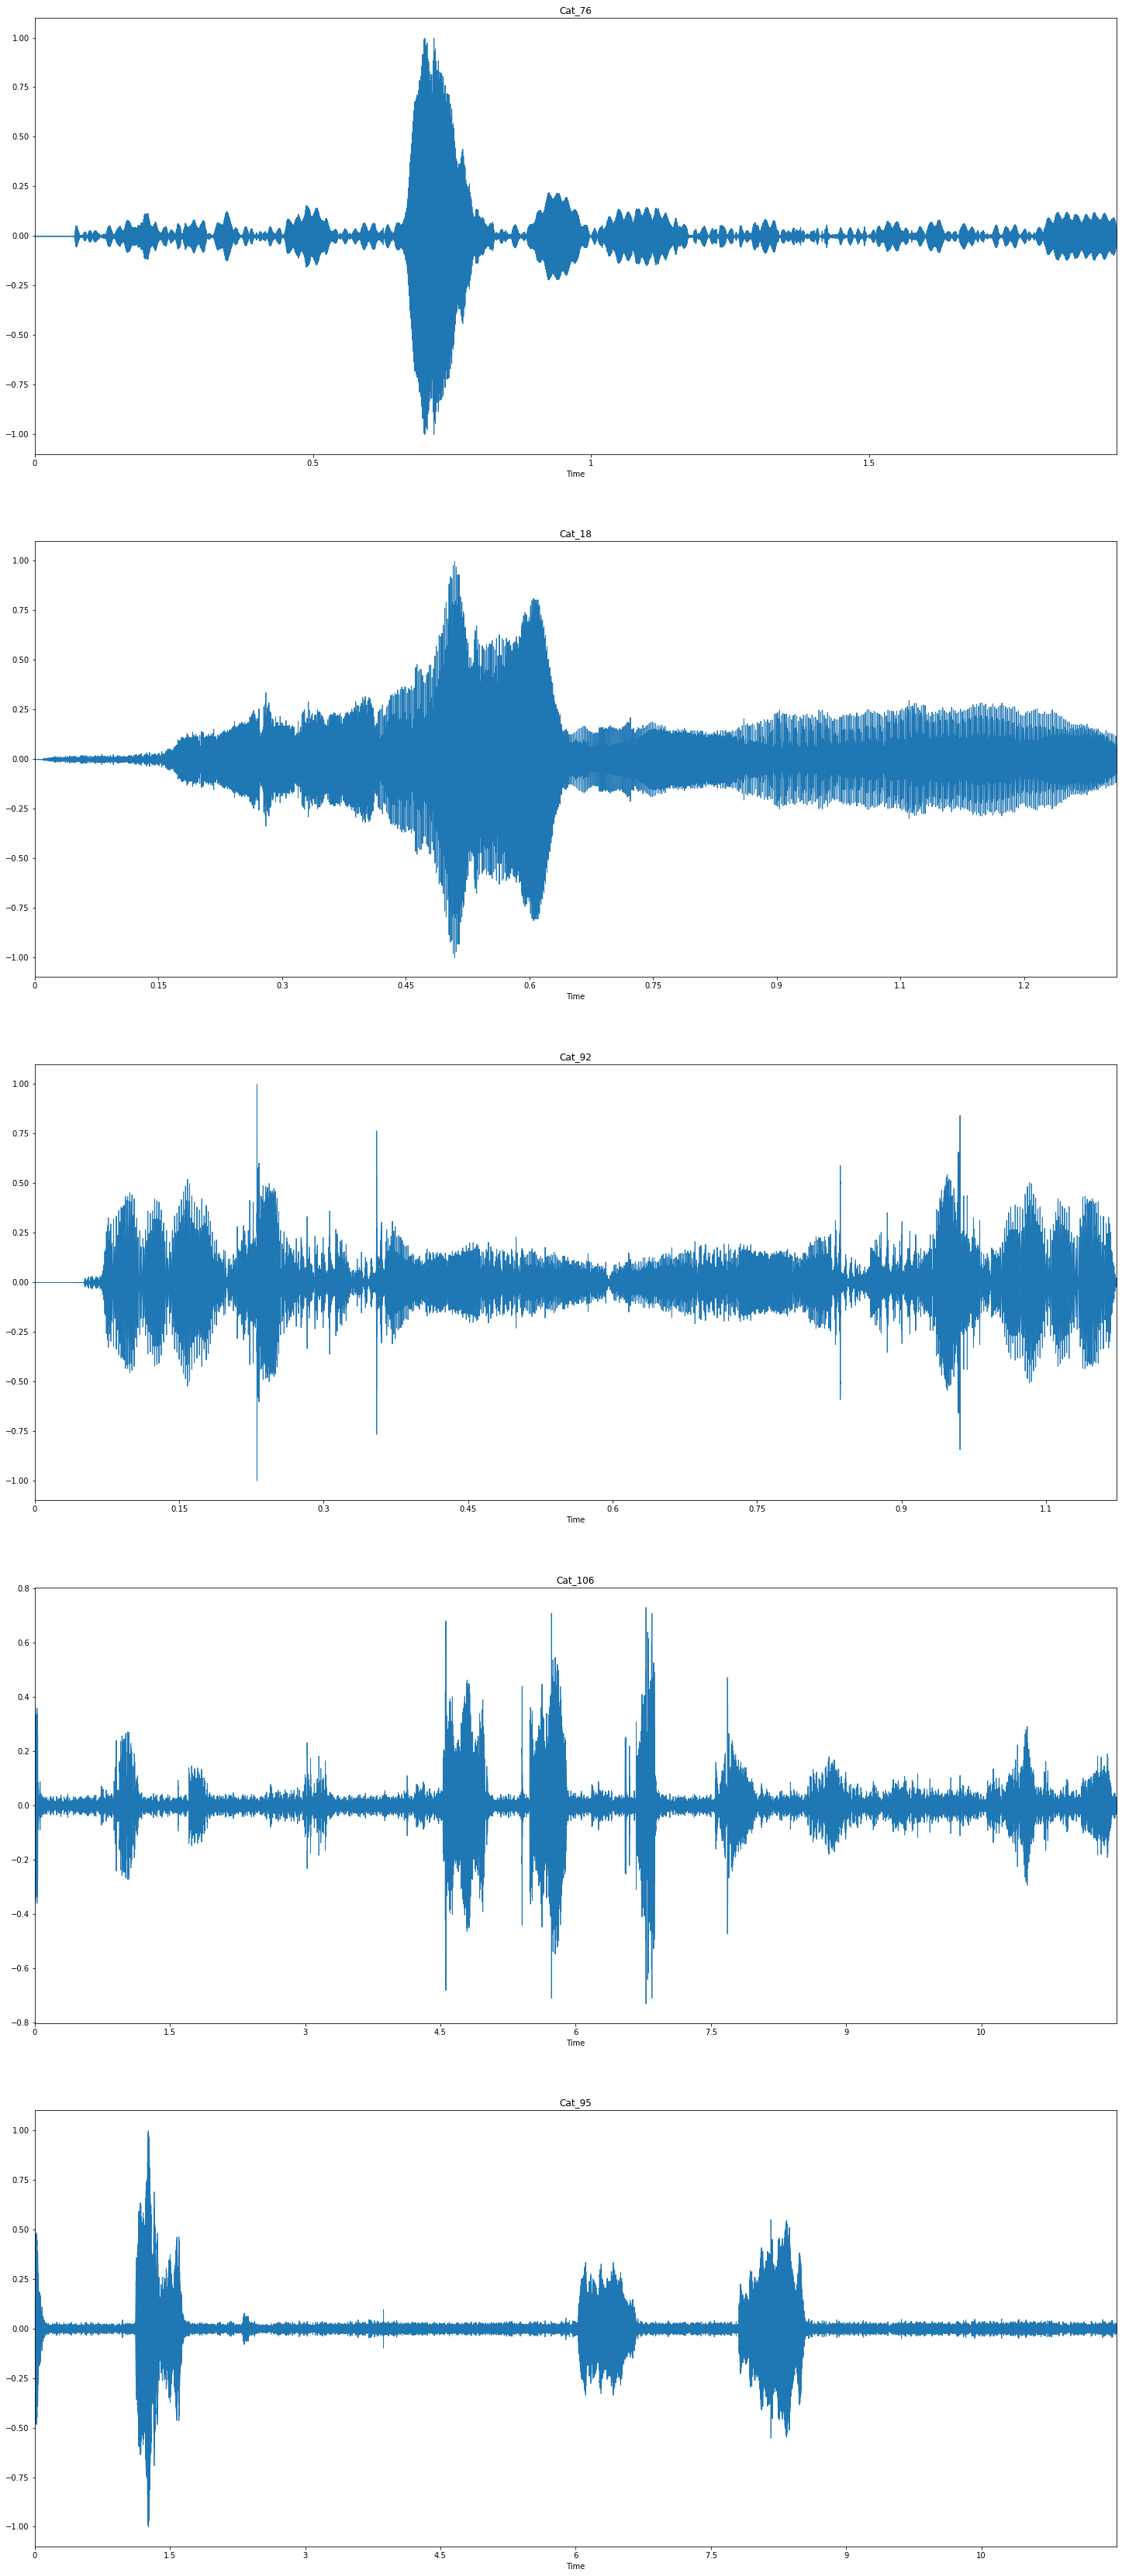

Showing waves for Dogs:


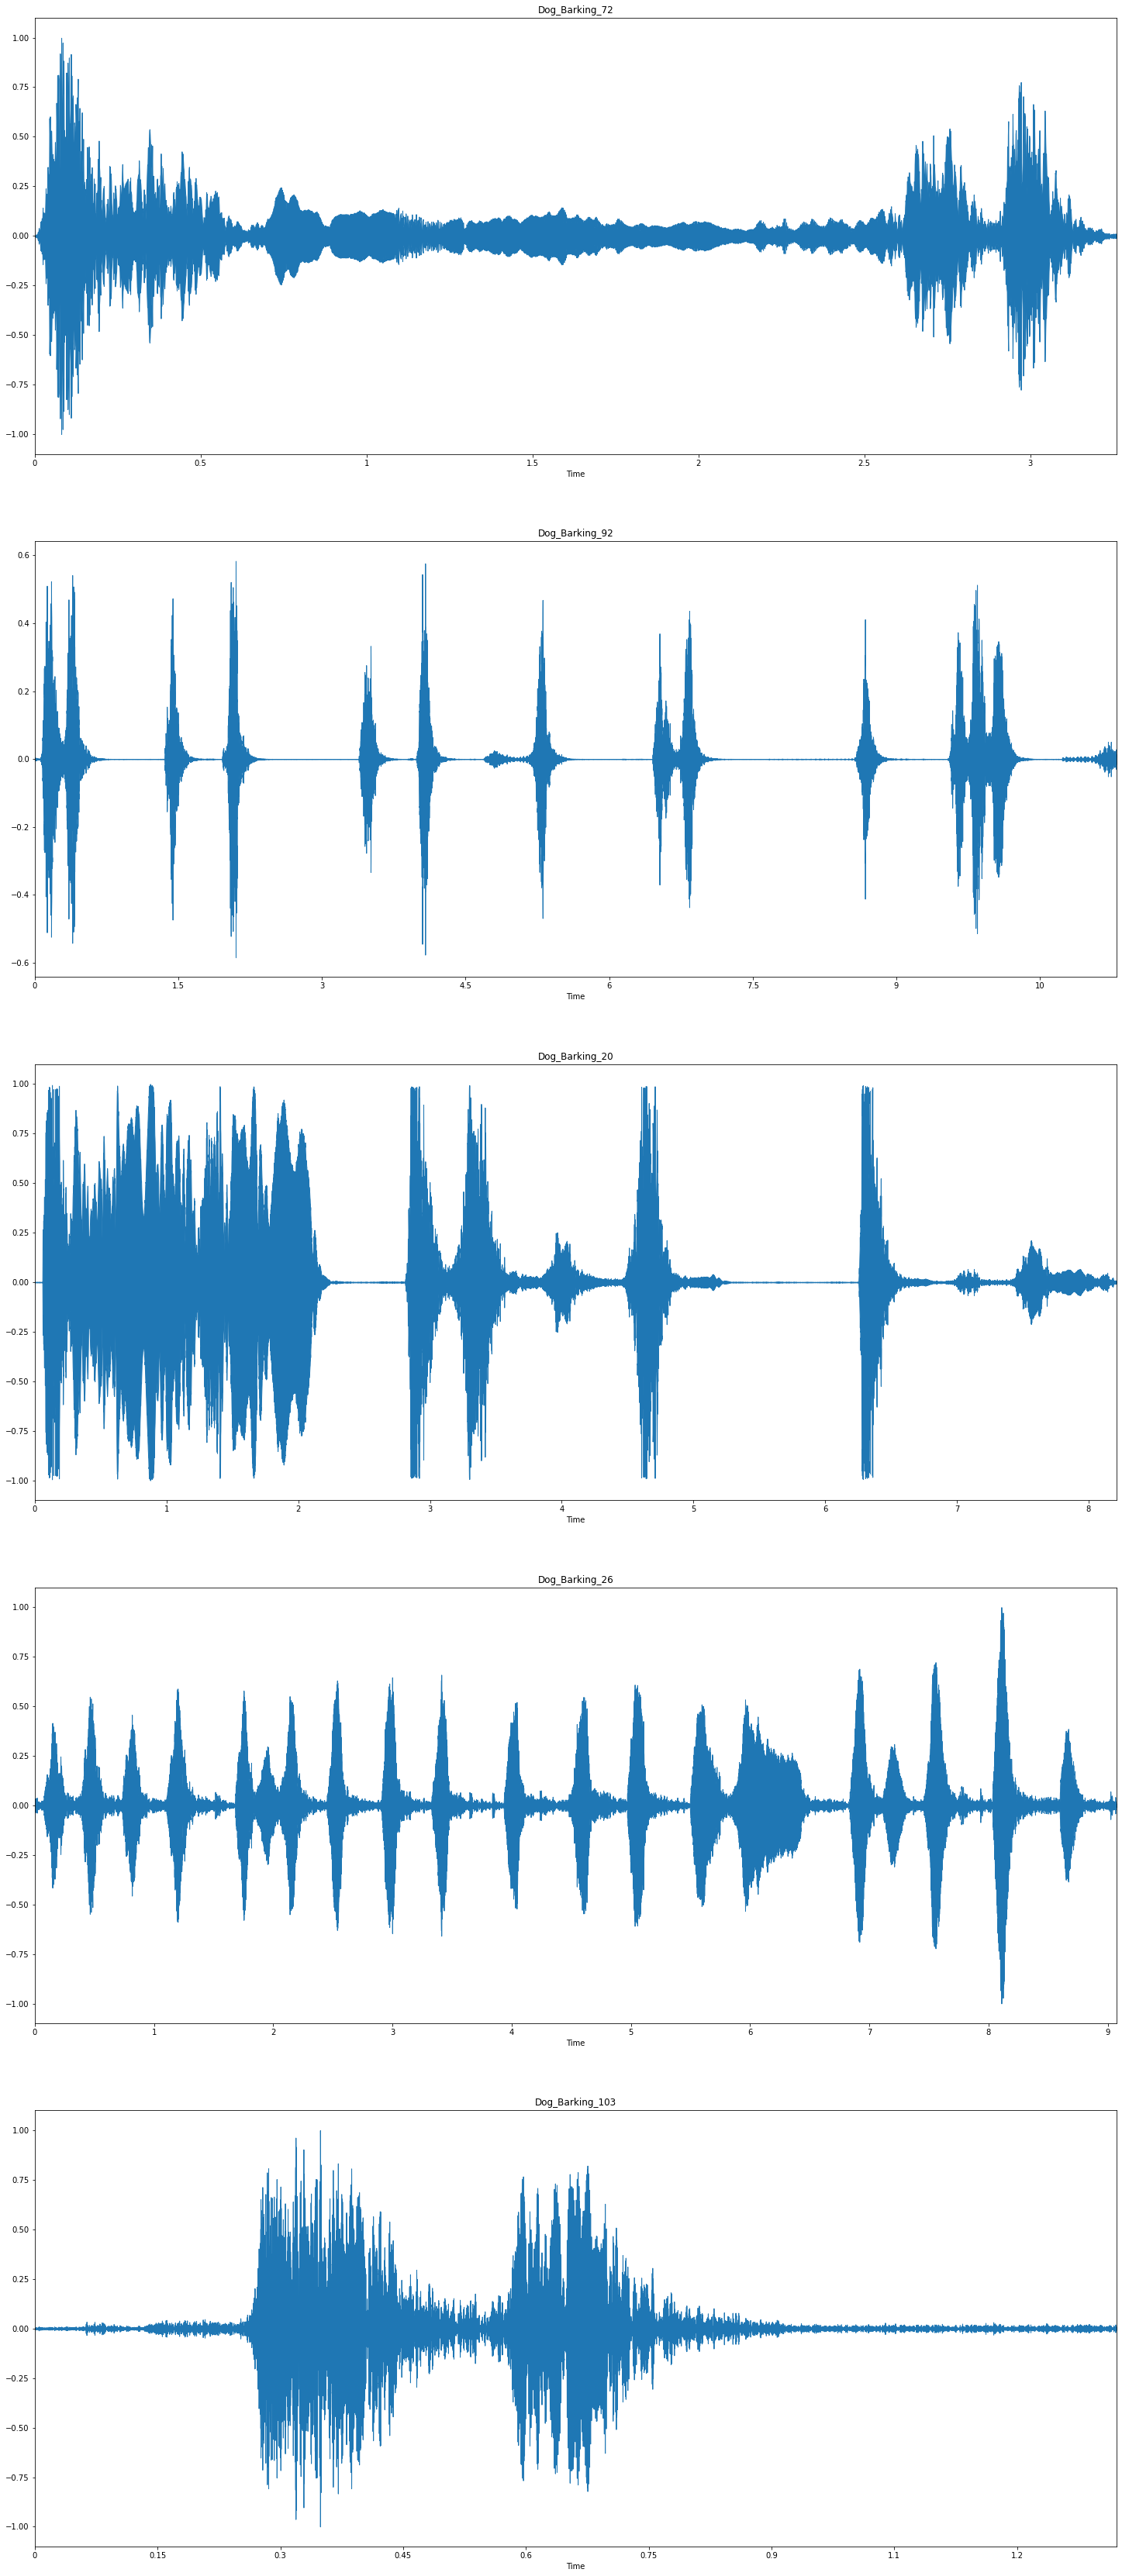

In [11]:

def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(len(sound_names),1,i)
        librosa.display.waveplot(np.array(f),sr=sr, x_axis='time')
        plt.title(n.title())
        i += 1        
    plt.show()


# plot some random audios for cats and dogs:
import random
random.seed(30)
cat_files_path = glob.glob(data_path+'/cat*.wav')
cat_file_name = [os.path.basename(file).rsplit( ".", 1 )[0]  for file in cat_files_path]
catsfiles_id_toplot = random.sample(cat_file_name, 5)
index_cats=[files_id.index(i) for i in catsfiles_id_toplot]
Cats_audio_toplot=[Cats_audio[ix] for ix in index_cats]

print('Showing waves for Cats:')
plot_waves(catsfiles_id_toplot,Cats_audio_toplot  )

dog_files_path = glob.glob(data_path+'/dog*.wav')
dog_file_name = [os.path.basename(file).rsplit( ".", 1 )[0]  for file in dog_files_path]
dogsfiles_id_toplot = random.sample(dog_file_name, 5)
index_dogs=[files_id.index(i)-n_cats for i in dogsfiles_id_toplot]
dogs_audio_toplot=[Dogs_audio[ix] for ix in index_dogs]

print('Showing waves for Dogs:')
plot_waves(dogsfiles_id_toplot, dogs_audio_toplot)

### Little bit of frequency domain analysis

In [24]:

from matplotlib.pyplot import specgram

def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(15,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(len(sound_names),1,i)
        d=librosa.core.stft(f)
        librosa.display.specshow(librosa.amplitude_to_db(d,ref=np.max), y_axis='log', x_axis='time')
        plt.title(n.title())
        i += 1
    plt.show()


Showing spectrograms for Cats:


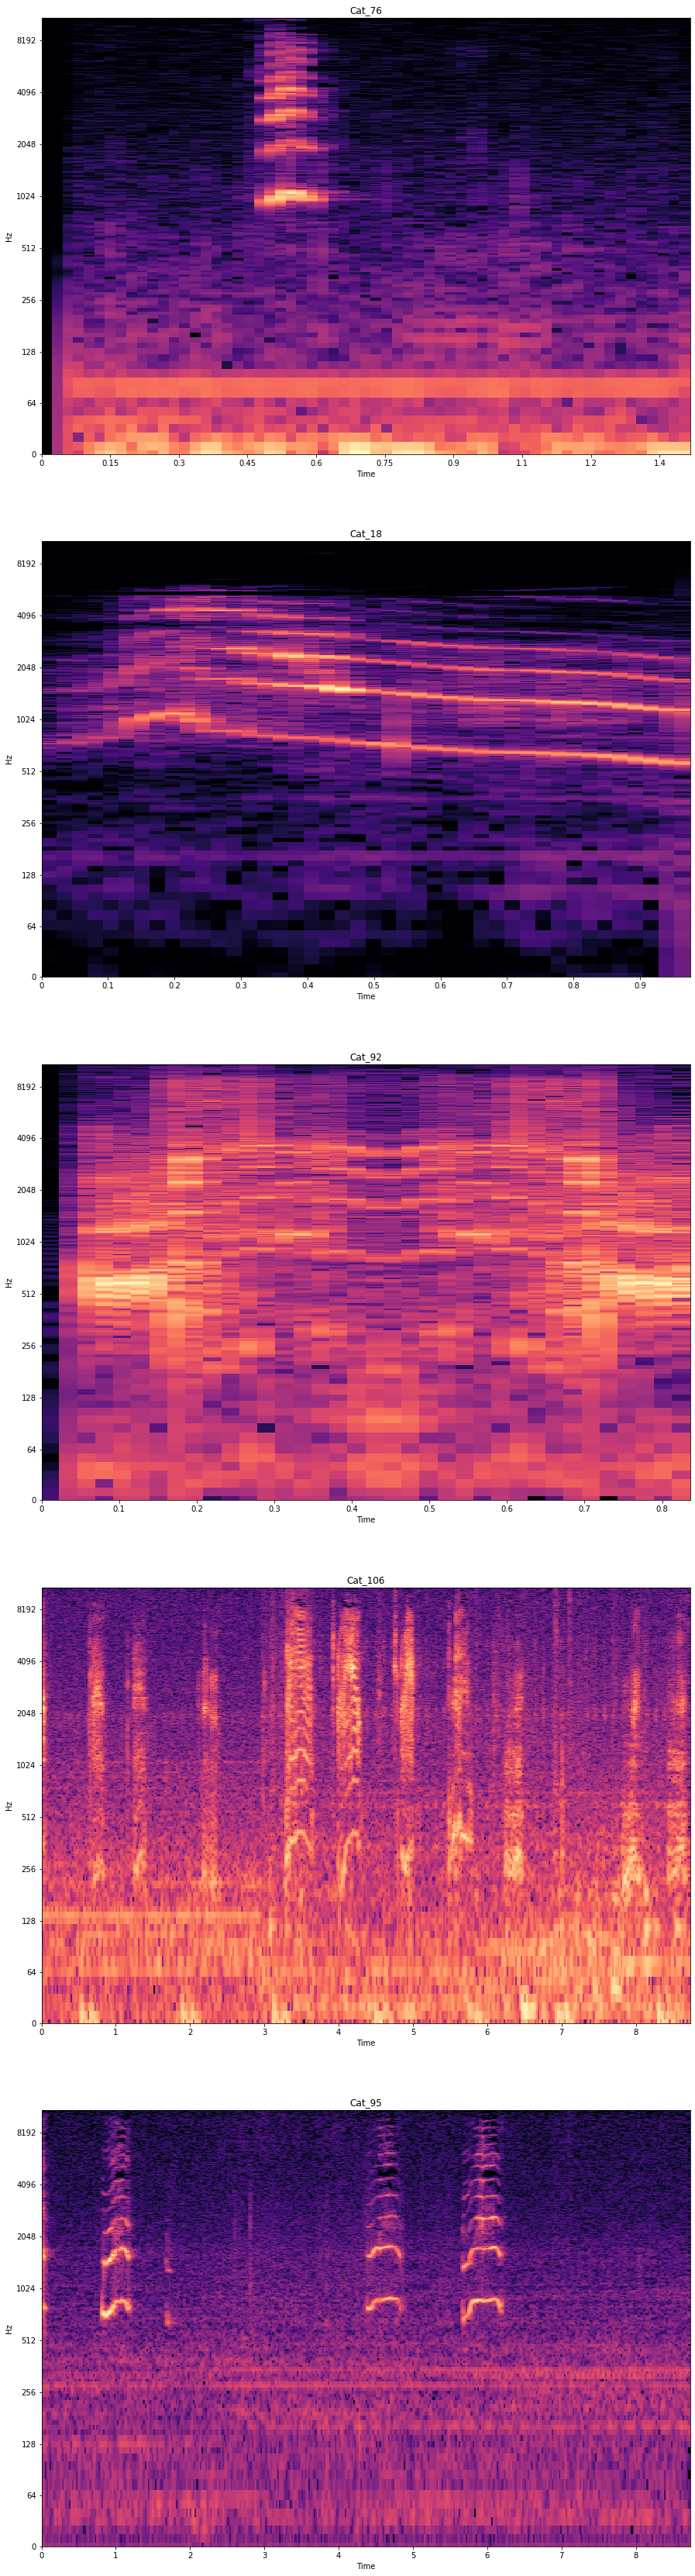

Showing spectrograms for Dogs:


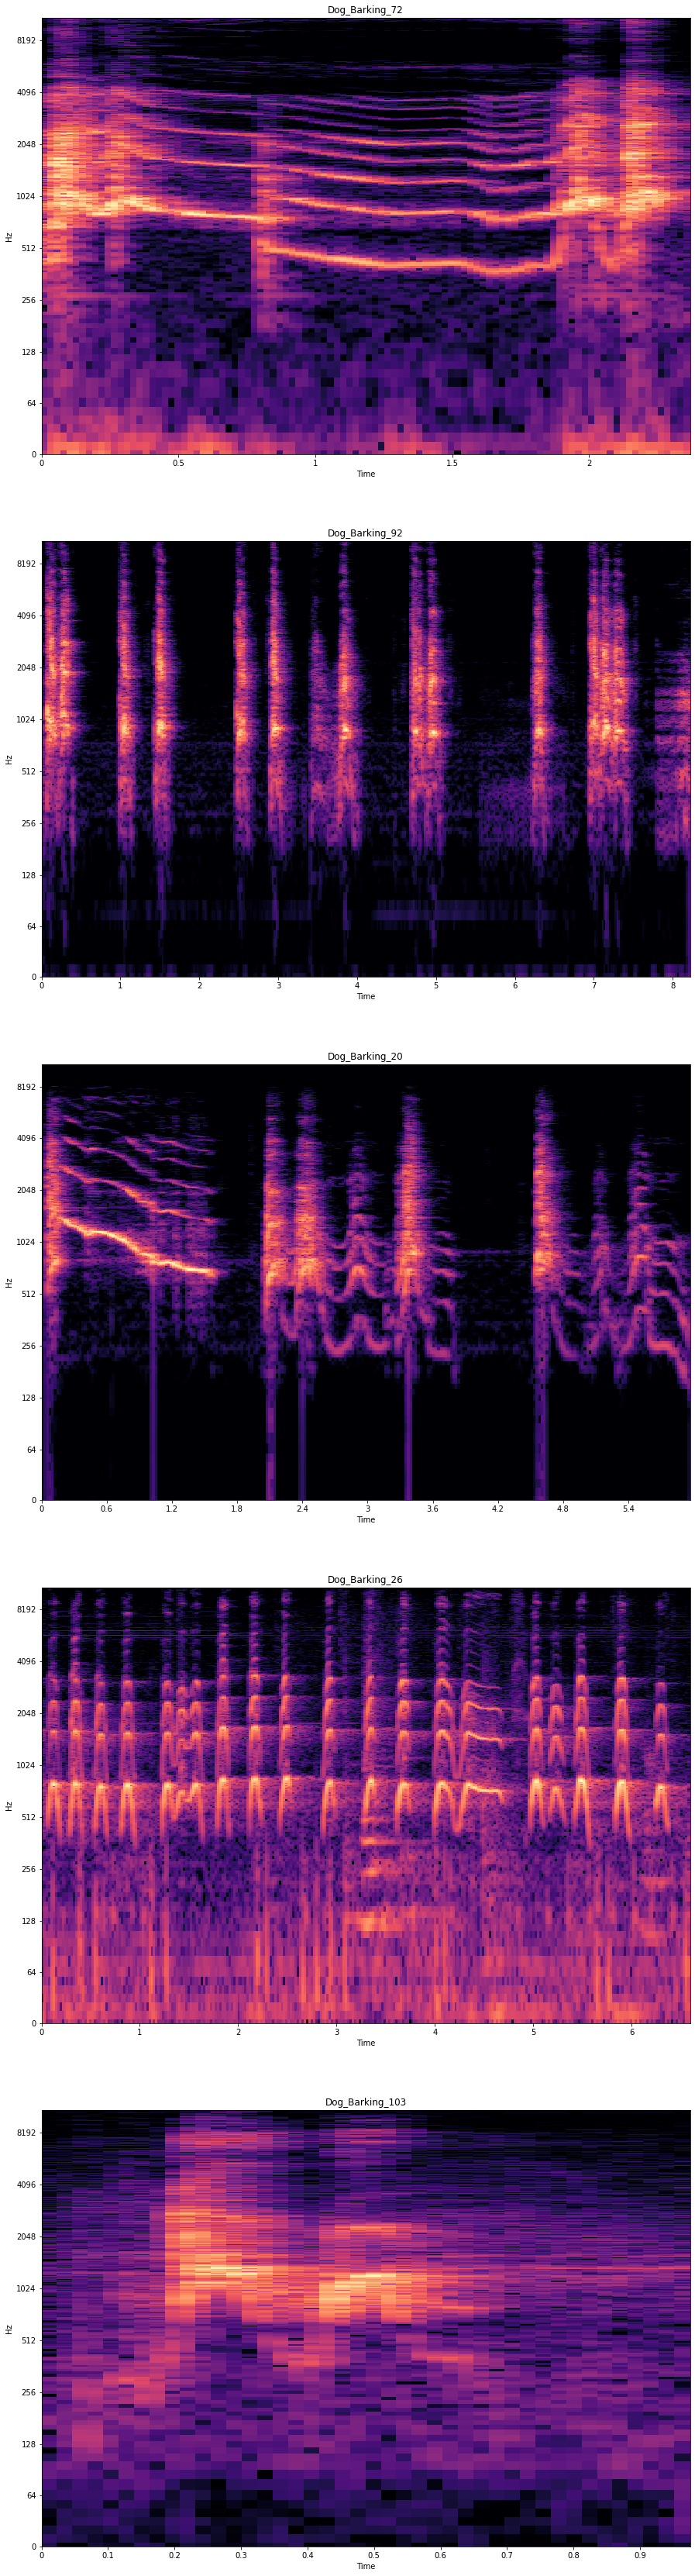

In [20]:
#spectrograms, 

print('Showing spectrograms for Cats:')
plot_specgram(catsfiles_id_toplot,Cats_audio_toplot)
print('Showing spectrograms for Dogs:')
plot_specgram(dogsfiles_id_toplot, dogs_audio_toplot)

## Few things observed
Looking at the audio waveform and cross checking after listening to actual audio file
1.we can say that there are multiple dogs in some audio files
2.can see and hear background noise

Looking at the spectrogram,
1. We can percieve the larynx height and relate that to height of the animal
2. Can distinguish dogs based on pitch 